<figure>
  <IMG SRC="../logo/logo.png" WIDTH=250 ALIGN="right">
</figure>

# Chap5_3, sine wave in a 1-D aquifer of half-infinite extent ($x>0$)

These are the exercises we did in class on Friday 2019-12-20.

They were done after the class downloaded the `Anaconda Python` distribution from [here](https://www.anaconda.com/distribution/).

The groundwater theory can be found in the syllabus that you have; the newest syllabus can be downloaded [here](https://github.com/Olsthoorn/TransientGroundwaterFlow/tree/master/Syllabus)

All the stuff for this course can be found [here](https://github.com/Olsthoorn/TransientGroundwaterFlow). If you don't have it yet try using the `clone` option at the right top of the page of this website. It will put everything on you computer, but the bonus is that you will be automatically informed if there are updates.

### Tutorials on using Python for engineers
For more help on using Python and jupyter notebooks see 
the notebook `Techniques.ipynb` in directory `\TransiendGroundwaterFlow/Assignment` and work some tutorial notebooks on *exploratory computing* by `Mark Bakker` on `github`.

### Groundwater
The solution for the head change due to a sinusoidal variation of the water level at $x=$ is given by

$$s(x,t) = A e^{-a x} \sin (\omega t - a x)$$

The discharge then is

$$ Q(x, t) = kD\, A\, e^{-a x} \left[sin(\omega t - a x) + cos(\omega t - ax)\right]$$

or, equivalently

$$ Q(x, t) = kD \, A\, e^{-a x}  \sqrt{2}\,\, sin(\omega t - a x + \frac \pi 4)$$

also from the theory we have
$$a = \sqrt{\frac {\omega S}{2 kD}}$$

We further have from the theory that the wave length equals
$$\Delta x_{full\,wave} = \frac {2 \pi}{a}$$

And the wave velocity
$$ v = \frac \omega a$$

It is always a good exercise and an essential check to verify the dimensions of all the variables and parmeters.

In [1]:
# Always load these modules for arrays, math and visualization
import numpy as np
import matplotlib.pyplot as plt

## First example

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We'll show the wave of head in the subsurface due to a sinusoidal tide at $x=0$. So we choose the parameters that we considere known ($kD$, $S$, $\omega$ and the amplitude $A$). Then we choose values of $x$ for which to compute the head change $s(x, t)$ and some times   for each of which we compute $s(x,t)$. This gives a number of waves, equal to the length of the list or array of chosen $t$ values.

In [3]:
times = np.arange(0, 24) / 24 # hourly values
x = np.linspace(0, 400, num=401) # the x values packed in an numpy array

we're done


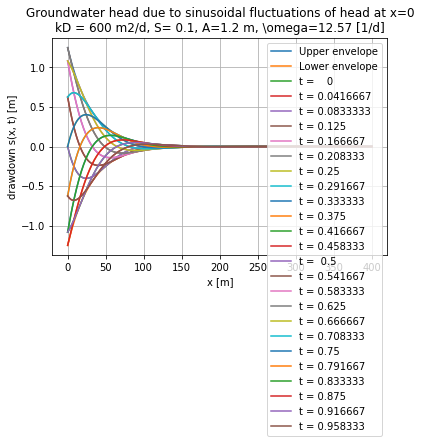

In [4]:
# Aquifer
kD = 600 # [m2/d], transmissivty
S = 0.1  # [-], storage coefficient

# Wave
A = 1.25 # [m] the amplitude
T = 0.5  # [d] cycle time
omega =  2 * np.pi / T  # [radians/d] angle velocity

# Combined property a
a = np.sqrt(omega * S  / (2 * kD)) # [1/m] damping factor

# Set up a figure
plt.title('Groundwater head due to sinusoidal fluctuations of head at x=0\n' +
          f'kD = {kD:.0f} m2/d, S={S:4g}, A={A:.1f} m, \omega={omega:.2f} [1/d]')
plt.xlabel('x [m]')
plt.ylabel('drawdown s(x, t) [m]')
plt.plot(x, +A * np.exp(-a * x), label='Upper envelope')
plt.plot(x, -A * np.exp(-a * x), label='Lower envelope')
plt.grid()

for t in times:
    y = A * np.exp(-a * x) * np.sin(omega * t - a * x)
    plt.plot(x, y, label='t = {:4g}'.format(t))

plt.legend()
print("we're done")

This picture shows what we wanted to, but it is not nice. There are too many times in the legend. And the picture is also quite small.
Further, it may become boring to have to type all these individual plot instructions all the time. There is a better way. We could define a function that does all setup work for us and also sets the size to a default value, which we can change at will when we call the function.

In [5]:
def newfig(title='forgot title?', xlabel='forgot xlabel?', ylabel='forgot ylabel?',
          xlim=None, ylim=None, xscale='linear', yscale='linear', size_inches=(12,7)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.grid()
    return ax

# try it
#newfig(xlim=(1.0e-3, 1.0e2), xscale='log')

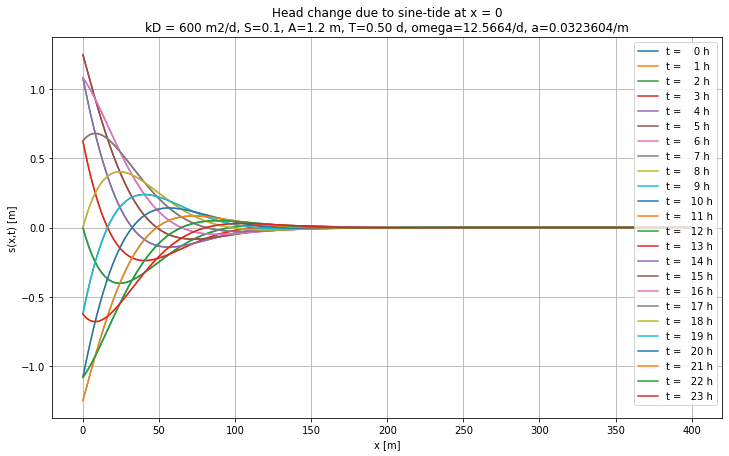

In [6]:
# Same example but now with newfig

# Aquifer
kD = 600 # [m2/d], transmissivty
S = 0.1  # [-], storage coefficient

# Wave
A = 1.25 # [m] the amplitude
T = 0.5  # [d] cycle time
omega =  2 * np.pi / T  # [radians/d] angle velocity

# Combined property a
a = np.sqrt(omega * S  / (2 * kD)) # [1/m] damping factor

title = 'Head change due to sine-tide at x = 0\n'
subtitle = f'kD = {kD:.0f} m2/d, S={S:.4g}, A={A:.1f} m, ' +\
                        f'T={T:.2f} d, omega={omega:3g}/d, a={a:3g}/m'

ax = newfig(title=title + subtitle, xlabel='x [m]', ylabel='s(x,t) [m]')


for t in times:
    y = A * np.exp(-a * x) * np.sin(omega * t - a * x)
    plt.plot(x, y, label='t = {:4g} h'.format(t * 24))

plt.legend()


This looks good, both the more concise code as the picture in size and legend. The title now contains all information pertaining to the problem we want to solve. So this can never be forgotton. I used a string for the title and the subtitle (second line of the title). Adding two strings like `str1 + str2` glues the two strings together, which is what was donce in the call of the `newfig` function with `title=title + subtitle`. The subtitle was  formatted with the values of the parameters we wanted to show. Read about formatting strings on the internet by searcheing for `Python fstrings`. It's easy. Then in the loop when plotting each wave, I formatted the label, not with the value in days but in hours by multiplying the value of `t` by 24 and adding `h` to the string to denote hours. See the code and the resulting legend. This reads much better than the numbers in the legend of the previous figure. Finally, the size of the figure is bigger. This is because `newfig()` used the default value for size_inches, which was set at (12, 7) in newfig, meaning 12 inches wide and 7 inchdes high. If you prefer cm or mm, you have to recalc yourself, i.e. call the function with mm and in the function convert to inches, because matplotlib always  treats the specified numbers as inches.

You can now experiment with the parameter values. Simply chane one or more and run all the cells in which you made changes again.

# Second example not one but several waves (superposition)

We still have only one value for kD and S since we word with the same aquifer. But we may want to consider several waves, each with its own omega, amplitude

We call the list of wave cycle times `Times` the omega values `omeagas`,
the list of amplitudes `amplitudes` and the list of damping factors `dampings`.

To make sure that each wave gets its own specific values we bundle these listes in a zip and then loop over them

for omgea, A, a in zip(omegas, amplitudes, dampings):
    etc
  
And this loops loops over the loop over the times (note that times is different from Times. times were just real times in days and Times are the list of cycle times for the waves!



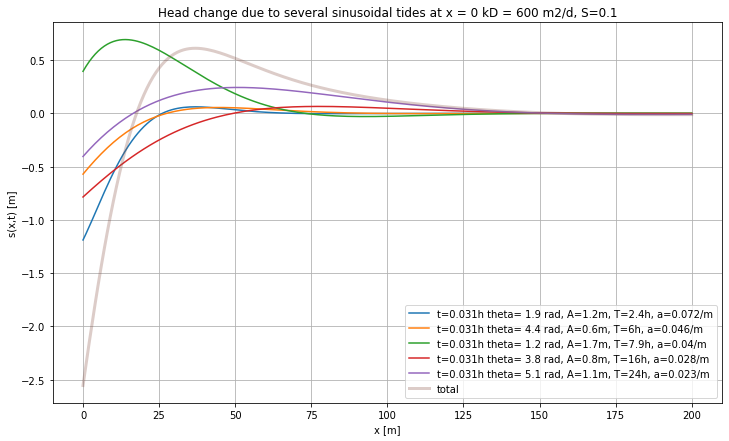

In [7]:
kD = 600 # [m2/d], transmissivty
S = 0.1 # [-], storage coefficient

thetas = np.array([0.3, 0.7, 0.19, 0.6, 0.81]) * 2 * np.pi # initial angles
amplitudes = [1.25, 0.6, 1.7, 0.8, 1.1] # [m] the 5 amplitudes
Times = np.array([0.1, 0.25, 0.33, 0.67, 1.0]) # [d] cycle times
omegas = 2 * np.pi / Times  # [radians/d] angle velocity
dampings = np.sqrt(omegas * S  / (2 * kD)) # [1/m] damping factor

x = np.linspace(0, 200, num=201)
times = np.arange(0, 24, 6) / 24


title = 'Head change due to several sinusoidal tides at x = 0 '
subtitle = f'kD = {kD:.0f} m2/d, S={S:.4g}'

ax = newfig(title=title + subtitle, xlabel='x [m]', ylabel='s(x,t) [m]')

t = times[3]
s = np.zeros_like(x)
for omega, A, a, theta in zip(omegas, amplitudes, dampings, thetas):
    ds = A * np.exp(-a * x) * np.sin(omega * t - a * x + theta)
    s = s + ds
    ax.plot(x, ds, label=
             't={:.2g}h theta= {:.2g} rad, A={:.2g}m, T={:.2g}h, a={:.2g}/m'.
             format(t/24, theta, A, 2 * np.pi/omega * 24, a))

ax.plot(x, s, lw=3, label='total', alpha=0.3)
ax.legend()

Next we'll only show the total effect, i.e. the sum of all individual waves, but we'll do that for a sequence of times

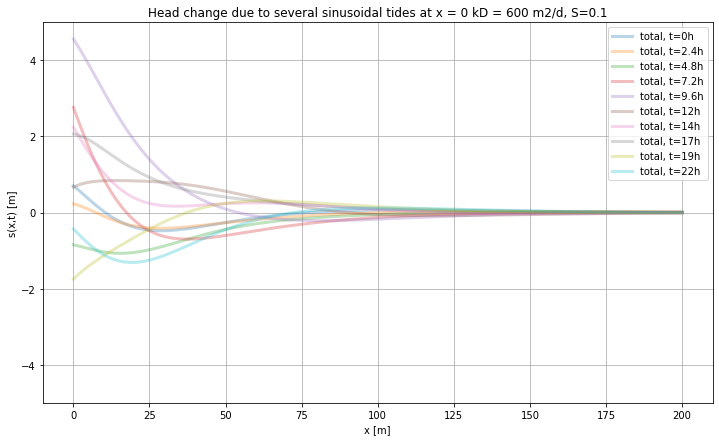

In [8]:
kD = 600 # [m2/d], transmissivty
S = 0.1 # [-], storage coefficient

thetas = np.array([0.3, 0.7, 0.19, 0.6, 0.81]) * 2 * np.pi # initial angles
amplitudes = [1.25, 0.6, 1.7, 0.8, 1.1] # [m] the 5 amplitudes
Times = np.array([0.1, 0.25, 0.33, 0.67, 1.0]) # [d] cycle times
omegas = 2 * np.pi / Times  # [radians/d] angle velocity
dampings = np.sqrt(omegas * S  / (2 * kD)) # [1/m] damping factor

x = np.linspace(0, 200, num=201)
times = np.arange(0, 1, 0.1)


title = 'Head change due to several sinusoidal tides at x = 0 '
subtitle = f'kD = {kD:.0f} m2/d, S={S:.4g}'

ax = newfig(title=title + subtitle, xlabel='x [m]', ylabel='s(x,t) [m]', ylim=(-5, 5))

t = times[3]
for t in times:
    s = np.zeros_like(x)
    for omega, A, a, theta in zip(omegas, amplitudes, dampings, thetas):
        ds = A * np.exp(-a * x) * np.sin(omega * t - a * x + theta)
        s = s + ds
        #ax.plot(x, ds, label=
        #         't={:.2g}h theta= {:.2g} rad, A={:.2g}m, T={:.2g}h, a={:.2g}/m'.
        #         format(t/24, theta, A, 2 * np.pi/omega * 24, a))

    ax.plot(x, s, lw=3, label=f'total, t={t * 24:.2g}h', alpha=0.3)
ax.legend(loc='best')


Finally, we'll animate the wave. You may read more about making animations using matplotlib [here](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c). Once the idea of animation is understood, animating functions become straightforward.

The computation and saving of the animation may require some time. But once the the computions are finished the animation well be shown by video-software that you already have on your PC. If not go to the directory where the video was saved as a .gis file and click it on. That shoul launch your video, Some times looking at the file with the file-browser is enough to have the browser animate the saved `.gis` file.

In [11]:
from matplotlib.animation import FuncAnimation
#import matplotlib.animation

In [32]:
# We need dit to make sure the video is launched
%matplotlib

kD = 600 # [m2/d], transmissivty
S = 0.1 # [-], storage coefficient

thetas = np.array([0.3, 0.7, 0.19, 0.6, 0.81]) * 2 * np.pi # initial angles
amplitudes = [1.25, 0.6, 1.7, 0.8, 1.1] # [m] the 5 amplitudes
Times = np.array([0.1, 0.25, 0.33, 0.67, 1.0]) # [d] cycle times
omegas = 2 * np.pi / Times  # [radians/d] angle velocity
dampings = np.sqrt(omegas * S  / (2 * kD)) # [1/m] damping factor

x = np.linspace(0, 200, num=201)
times = np.arange(0, 1, 0.01)


title = 'Several sines superimposed, '
subtitle = f'kD = {kD:.0f} m2/d, S={S:.4g}'

ax = newfig(title=title + subtitle, xlabel='x [m]', ylabel='s(x,t) [m]',
            ylim=(-5, 5), xlim=(0, x[-1]), size_inches=(6, 4))
fig = plt.gcf()

# initial
line, = ax.plot(x,np.zeros_like(x), lw=3, alpha=0.3) # the comme picks line from list [line]

def init():
    pass # don't need to do anything, we already have the initial line
    return line, # the comma packs line int a tuple

def animate(i): # this does the work after each cycle.
    t = times[i]
    s = np.zeros_like(x)
    for omega, A, a, theta in zip(omegas, amplitudes, dampings, thetas):
        s += A * np.exp(-a * x) * np.sin(omega * t - a * x + theta)
    line.set_data(x, s) # replaces the line s
    return line,  # comma packs line in to a tuple like (line), required

# animate
anim = FuncAnimation(fig, animate, init_func=init, fargs=None,
                               frames=len(times), interval=50, blit=True)

# write your animation to disk
anim.save('compound_sine_wave.gif', writer='imagemagick')

# show reaults
plt.show()


Using matplotlib backend: MacOSX
